In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


### Models: Linear Regression and Multiple Linear Regression

In [99]:
from sklearn.linear_model import LinearRegression


#### Price and highway-mpg

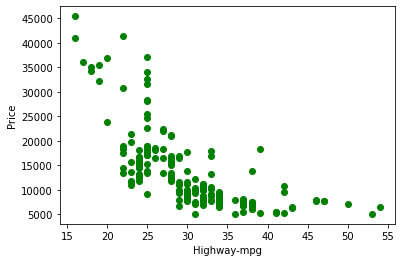

In [100]:
X = df[['highway-mpg']]
Y = df['price']
plt.scatter(X,Y, color='green')
plt.xlabel('Highway-mpg')
plt.ylabel('Price')
plt.show()

In [117]:
LR_model = LinearRegression()
LR_model

LinearRegression()

In [118]:
LR_model.fit(X,Y)

LinearRegression()

In [119]:
Y_hat = LR_model.predict(X)
print('Real value of price:', Y[0:10])
print('Predicted value of price:', Y_hat[0:10])

Real value of price: 0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
5    15250.0
6    17710.0
7    18920.0
8    23875.0
9    16430.0
Name: price, dtype: float64
Predicted value of price: [16236.50464347 16236.50464347 17058.23802179 13771.3045085
 20345.17153508 17879.97140011 17879.97140011 17879.97140011
 21988.63829172 14593.03788682]


In [103]:
print("Price=",LR_model.intercept_,"+",LR_model.coef_[0],".X")


Price= 38423.3058581574 + -821.7333783219254 .X


#### Price and highway-mpg

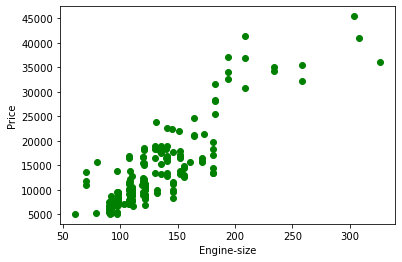

In [104]:
X2 = df[['engine-size']]
Y2 = df['price']
plt.scatter(X2,Y2, color='green')
plt.xlabel('Engine-size')
plt.ylabel('Price')
plt.show()

In [105]:
LR_model.fit(X2, Y2)

LinearRegression()

In [106]:
Y_hat_2 = LR_model.predict(X2)
print('Real value of price:', Y2[0:10])
print('Predicted value of price:', Y_hat_2[0:10])

Real value of price: 0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
5    15250.0
6    17710.0
7    18920.0
8    23875.0
9    16430.0
Name: price, dtype: float64
Predicted value of price: [13728.4631336  13728.4631336  17399.38347881 10224.40280408
 14729.62322775 14729.62322775 14729.62322775 14729.62322775
 13895.32314929 10057.54278839]


In [107]:
print("Y=",LR_model_2.intercept_,"+",LR_model_2.coef_[0],"*X")

print("Price=",LR_model_2.intercept_,"+",LR_model_2.coef_[0],"*Engine-size")

Y= -7963.338906281024 + 166.8600156914158 *X
Price= -7963.338906281024 + 166.8600156914158 *Engine-size


#### Multiple Linear Regression

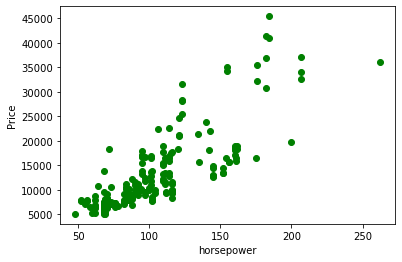

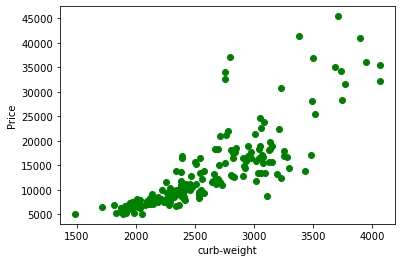

In [108]:
X3 = df[['horsepower']]
Y3 = df['price']
plt.scatter(X3,Y3, color='green')
plt.xlabel('horsepower')
plt.ylabel('Price')
plt.show()

X4 = df[['curb-weight']]
Y4 = df['price']
plt.scatter(X4,Y4, color='green')
plt.xlabel('curb-weight')
plt.ylabel('Price')
plt.show()

In [109]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
LR_model.fit(Z, Y)

LinearRegression()

In [110]:
LR_model.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [111]:
print("Y=",LR_model.intercept_,"+",LR_model.coef_[0],"*X1","+",LR_model.coef_[1],"*X2",
     "+",LR_model.coef_[2],"*X3","+",LR_model.coef_[3],"*X4",)

Y= -15806.624626329227 + 53.49574422604913 *X1 + 4.707700994613939 *X2 + 81.53026382122766 *X3 + 36.05748881648589 *X4


In [112]:
Y_hat_z = LR_model.predict(Z)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


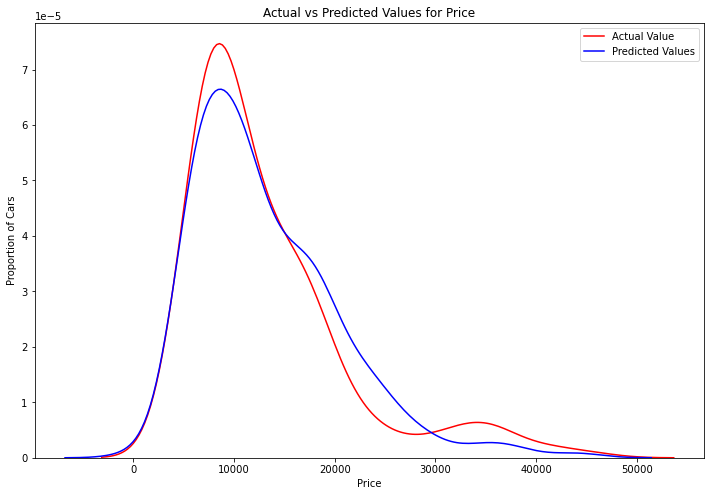

In [56]:
import seaborn as sns

#plt.figure(figsize=(width, height))
fig = plt.figure(figsize=(12,8))

ax1 = sns.distplot(df['price'], hist=False, color="r")
ax2 = sns.distplot(Y_hat, hist=False, color="b",  ax=ax1)

plt.legend(labels=['Actual Value','Predicted Values'])

plt.title('Actual vs Predicted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

#### Regplot

In [31]:
import seaborn as sns

(-5000.0, 48182.520092025305)

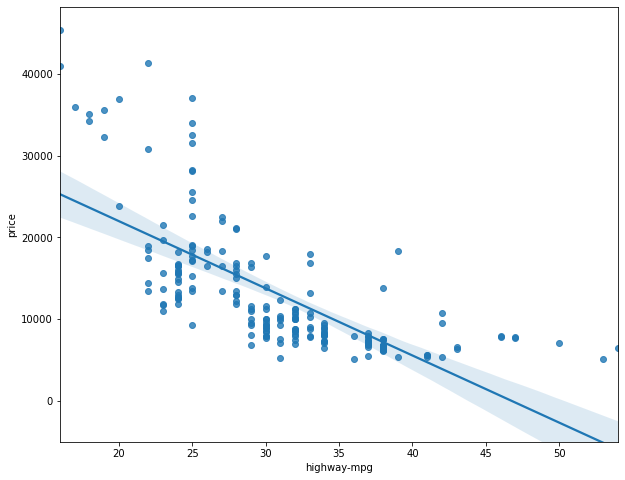

In [40]:
width = 10
height = 8
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(-5000,)

(0.0, 47414.1)

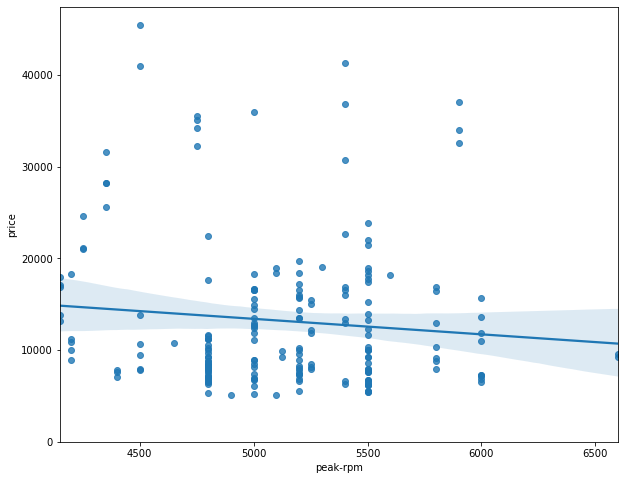

In [43]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [44]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


#### Residual Plot

The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

 If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


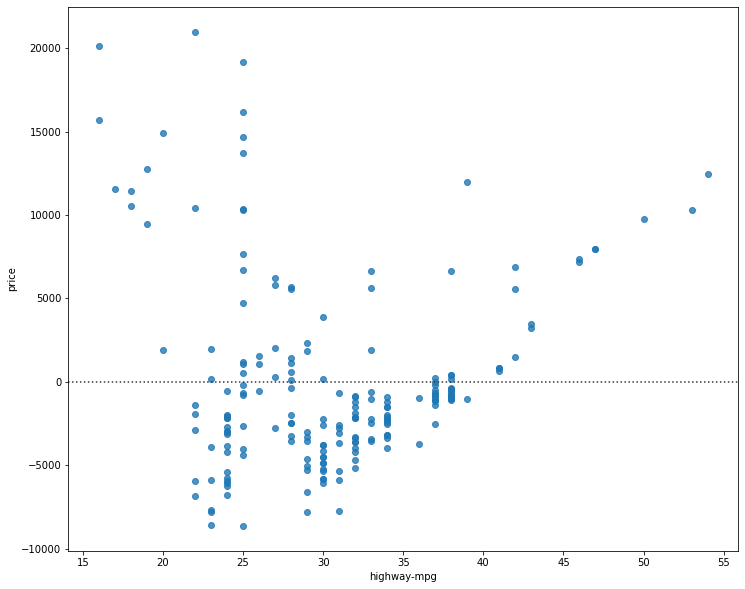

In [45]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

#### Polynomial Regression

In [68]:
def PlotPolly(model, independent_variable, dependent_variabble, X_Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))# is used to set the face color of the Figure rectangle
    fig = plt.gcf()
    plt.xlabel(X_Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()
    


In [69]:
x = df['highway-mpg']
y = df['price']

# Here we use a polynomial of the 3rd order (cubic)
#p = polyfit( x , y , n ) returns the coefficients for a polynomial p(x) of degree n that is a best fit 
#(in a least-squares sense) for the data in y . The coefficients in p are in descending powers, and the 
#length of p is n+1

f = np.polyfit(x, y, 3)
print("f is:",f)
p = np.poly1d(f)
print("p is:",p)

f is: [-1.55663829e+00  2.04754306e+02 -8.96543312e+03  1.37923594e+05]
p is:         3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


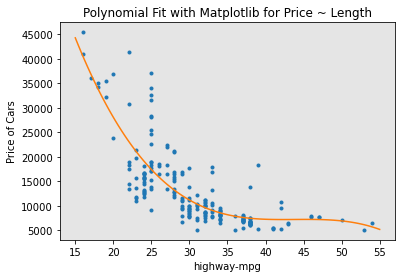

In [70]:
PlotPolly(p, x, y, 'highway-mpg')

##### 11 order polynomial model 

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


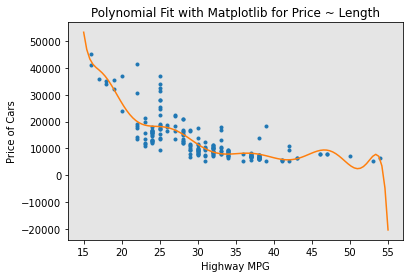

In [65]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

#### Multivariate Polynomial

In [72]:
# Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to
# the specified degree
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

from sklearn.preprocessing import PolynomialFeatures

In [74]:
Mpr=PolynomialFeatures(degree=2)
Z_pr=Mpr.fit_transform(Z)

print("Shape of Z", Z.shape)
print("Shape of Z after tranforming to new degree", Z_pr.shape)

Shape of Z (201, 4)
Shape of Z after tranforming to new degree (201, 15)


In [75]:
Z

,horsepower,curb-weight,engine-size,highway-mpg
0,111.0,2548,130,27
1,111.0,2548,130,27
2,154.0,2823,152,26
3,102.0,2337,109,30
4,115.0,2824,136,22
...,...,...,...,...
196,114.0,2952,141,28
197,160.0,3049,141,25
198,134.0,3012,173,23
199,106.0,3217,145,27


In [76]:
Z_pr

array([[1.0000e+00, 1.1100e+02, 2.5480e+03, ..., 1.6900e+04, 3.5100e+03,
        7.2900e+02],
       [1.0000e+00, 1.1100e+02, 2.5480e+03, ..., 1.6900e+04, 3.5100e+03,
        7.2900e+02],
       [1.0000e+00, 1.5400e+02, 2.8230e+03, ..., 2.3104e+04, 3.9520e+03,
        6.7600e+02],
       ...,
       [1.0000e+00, 1.3400e+02, 3.0120e+03, ..., 2.9929e+04, 3.9790e+03,
        5.2900e+02],
       [1.0000e+00, 1.0600e+02, 3.2170e+03, ..., 2.1025e+04, 3.9150e+03,
        7.2900e+02],
       [1.0000e+00, 1.1400e+02, 3.0620e+03, ..., 1.9881e+04, 3.5250e+03,
        6.2500e+02]])

#### Using Pipeline

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [79]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)

In [81]:
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [82]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [83]:
Z

,horsepower,curb-weight,engine-size,highway-mpg
0,111.0,2548.0,130.0,27.0
1,111.0,2548.0,130.0,27.0
2,154.0,2823.0,152.0,26.0
3,102.0,2337.0,109.0,30.0
4,115.0,2824.0,136.0,22.0
...,...,...,...,...
196,114.0,2952.0,141.0,28.0
197,160.0,3049.0,141.0,25.0
198,134.0,3012.0,173.0,23.0
199,106.0,3217.0,145.0,27.0


In [84]:
y_pipe=pipe.predict(Z)
y_pipe[0:5]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164])

In [85]:
Input_2=[('scale',StandardScaler()),('model',LinearRegression())]

pipe_2=Pipeline(Input_2)

pipe_2.fit(Z,y)

ypipe=pipe_2.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

## Models evaluation

<b>R-squared</b>: R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line. The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

"The higher the R-squared, the better the model fits our data"

<b>Mean Squared Error (MSE)</b>: The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).

In [121]:
# Simple Linear Regression
#highway_mpg_fit
LR_model.fit(X, Y)
# Find the R^2
print('The R-square of Simple Linear Regression with highway_mpg is: ', LR_model.score(X, Y))

# engine_size
LR_model.fit(X2, Y2)
print('The R-square of Simple Linear Regression with engine size is: ', LR_model.score(X2, Y2))

# Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
LR_model.fit(Z, Y)
# Find the R^2
print('The R-square of Multiple Linear Regression is: ', LR_model.score(Z, Y))

from sklearn.metrics import r2_score
print('The R-square of Polynomial Regreassion is: ', r2_score(y, p(x)))

The R-square of Simple Linear Regression with highway_mpg is:  0.4965911884339176
The R-square of Simple Linear Regression with engine size is:  0.7609686443622008
The R-square of Multiple Linear Regression is:  0.8093562806577457
The R-square of Polynomial Regreassion is:  0.6741946663906517


In [124]:
from sklearn.metrics import mean_squared_error
print('The mean square error of Simple Linear Regression (highway_mpg) is : ',mean_squared_error(df['price'], Y_hat))
print('The mean square error of Simple Linear Regression (engine size) is : ',mean_squared_error(df['price'], Y_hat_2))
print('The mean square error of Multiple Linear Regression is : ',mean_squared_error(df['price'], Y_hat_z))
print('The mean square error of Polynomial Regression is : ',mean_squared_error(df['price'], p(x)))


The mean square error of Simple Linear Regression (highway_mpg) is :  31635042.944639888
The mean square error of Simple Linear Regression (engine size) is :  15021126.02517414
The mean square error of Multiple Linear Regression is :  11980366.87072649
The mean square error of Polynomial Regression is :  20474146.42636123


We conclude that the MLR model is the best model for predicting pricing from our dataset after comparing these three models. This finding makes sense because we have a total of 27 variables and we know that more than one of them can predict the final car pricing.